In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')  
plt.rcParams['text.usetex'] = True

## Diffusion Equation

$\textit{Diffusion Equation} : \partial_t \phi = \kappa\partial_{x}^2\phi$                                                                                    
$\qquad \hat{\phi}_k^{n+1}= \hat{\phi}_k^{n}[1-\kappa k^2 (\Delta t)]$

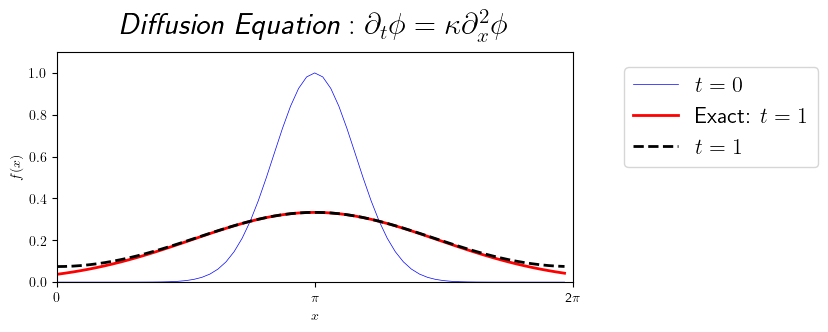

In [2]:
kappa = 1
tf = 1
L = 2*np.pi
N = 64
h = L/N
j = np.arange(0,N)
x = j*h
f = np.exp(-2*(x-np.pi)**2)
fk = np.fft.rfft(f,N)/N
kx = np.linspace(0, N//2, N//2+1)
fk_t = fk*np.exp(-kappa*kx**2*tf)
f_t = np.fft.irfft(fk_t,N)*N
a = 1/2
a_p = np.sqrt(a**2+2*kappa*tf)
f_exact = (a/a_p)*np.exp(-(x-np.pi)**2/(2*a_p**2))

fig = plt.figure(figsize = (6,3))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(x, f, 'b-', label = '$t=0$', lw = 0.5)
ax1.plot(x, f_exact, 'r-', label = 'Exact: $t=1$', lw = 2)
ax1.plot(x, f_t, 'k--', label = '$t=1$', lw = 2)
ax1.set_xlim(0,2*np.pi)
ax1.set_ylim(0,1.1)
ax1.set_xlabel('$x$',fontsize=10)
ax1.set_ylabel('$f(x)$',fontsize=10)
ax1.set_xticks([0, np.pi, 2*np.pi])
ax1.set_xticklabels(['$0$', '$\pi$', '2$\pi$'])
plt.tight_layout()
plt.title(r'$\textit{Diffusion Equation} : \partial_t \phi = \kappa\partial_{x}^2\phi$', fontsize=22,y=1.041)
plt.legend(loc=(1.1, 0.5), fontsize=16)
plt.show()

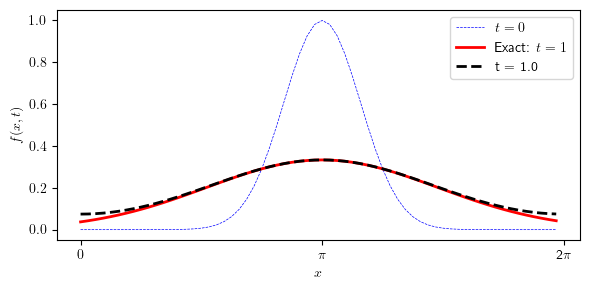

In [3]:
kappa = 1
tf = 1
dt = 0.1
L = 2*np.pi
N = 64
h = L/N
j = np.arange(0,N)
x = j*h
f = np.exp(-2*(x-np.pi)**2)
fk = np.fft.rfft(f,N)/N
kx = np.linspace(0, N//2, N//2+1)

a = 1/2
a_p = np.sqrt(a**2 + 2*kappa*tf)
f_exact = (a/a_p) * np.exp(-(x-np.pi)**2/(2*a_p**2))

f_t = f.copy()
for t in np.arange(0, tf + dt, dt):
    fk_t = fk * np.exp(-kappa * kx**2 * t)    
    f_t = np.fft.irfft(fk_t, N) * N
    
    clear_output(wait=True)
    fig = plt.figure(figsize = (6,3))
    plt.plot(x, f, 'b--', label='$t=0$', lw=0.5)
    plt.plot(x, f_exact, 'r-', label='Exact: $t=1$', lw=2)  # Exact solution at tf
    plt.plot(x, f_t, 'k--', label=f't = {t:.1f}', lw=2)
    plt.xlabel(r'$x$', fontsize=10)
    plt.ylabel(r'$f(x,t)$', fontsize=10)
    plt.xticks([0, np.pi, 2*np.pi], ['$0$', '$\pi$', '2$\pi$'])
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

 ### Crank-Nicolson scheme                                                                                                                                              
                                                                                                                                            
$\quad \displaystyle { \hat{u}_k^{n+1} = \hat{u}_k^n - \kappa k^2 \frac{(\Delta t)}{2} \big( \hat{u}_k^n + \hat{u}_k^{n+1} \big)  }$           
$\quad \displaystyle{\hat{u}_k^{n+1} = \hat{u}_k^n - \kappa k^2 \frac{(\Delta t)}{2} \hat{u}_k^n - \kappa k^2 \frac{(\Delta t)}{2} \hat{u}_k^{n+1}  }$                  
$\quad \displaystyle { \hat{u}_k^{n+1} + \kappa k^2 \frac{(\Delta t)}{2} \hat{u}_k^{n+1} = \hat{u}_k^n - \kappa k^2 \frac{(\Delta t)}{2} \hat{u}_k^n  }$      
$\quad \displaystyle { \hat{u}_k^{n+1}\bigg[1 + \kappa k^2 \frac{(\Delta t)}{2} \bigg] = \hat{u}_k^n\bigg[1 - \kappa k^2 \frac{(\Delta t)}{2}\bigg]  }$                                                                                                                                            
$\quad \displaystyle { \hat{u}_k^{n+1} = \frac{ \bigg[1 - \kappa k^2 \frac{(\Delta t)}{2}\bigg]} { \bigg[1 + \kappa k^2 \frac{(\Delta t)}{2} \bigg] } \hat{u}_k^n}$                                                                                                                                                                                                                      

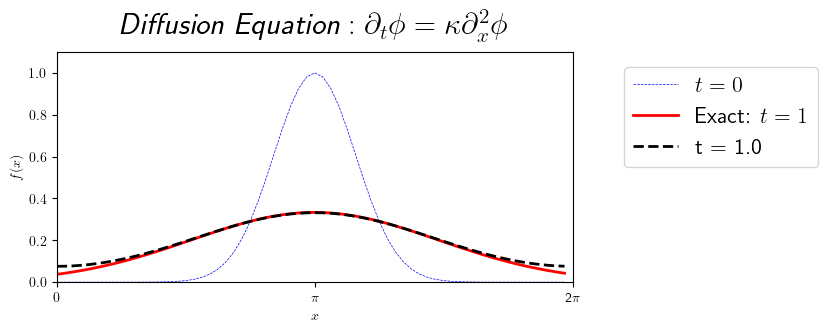

In [4]:
kappa = 1
tf = 1
dt = 0.01
L = 2*np.pi
N = 64
h = L/N
j = np.arange(0,N)
x = j*h
f = np.exp(-2*(x-np.pi)**2)
fk = np.fft.rfft(f,N)/N
kx = np.linspace(0, N//2, N//2+1)

for t in np.arange(0, tf+dt , dt):
    fk_new = ( fk * (1 - kappa * kx**2 * dt / 2)    ) / (1 + kappa * kx**2 * dt / 2) 
    fk = fk_new
f_plot = np.fft.irfft(fk, N) * N  # Convert back to physical space
f_exact = (a/a_p)*np.exp(-(x-np.pi)**2/(2*a_p**2))

fig = plt.figure(figsize = (6,3))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(x, f, 'b--', label = '$t=0$', lw = 0.5)
ax1.plot(x, f_exact, 'r-', label = 'Exact: $t=1$', lw = 2)
ax1.plot(x, f_plot, 'k--', lw=2, label=f't = {t:.1f}')
ax1.set_xlim(0,2*np.pi)
ax1.set_ylim(0,1.1)
ax1.set_xlabel('$x$',fontsize=10)
ax1.set_ylabel('$f(x)$',fontsize=10)
ax1.set_xticks([0, np.pi, 2*np.pi])
ax1.set_xticklabels(['$0$', '$\pi$', '2$\pi$'])
plt.tight_layout()
plt.title(r'$\textit{Diffusion Equation} : \partial_t \phi = \kappa\partial_{x}^2\phi$', fontsize=22,y=1.041)
plt.legend(loc=(1.1, 0.5), fontsize=16)
plt.show()

## Wave Equation

$\textit{Wave Equation} : \partial_t u=-c\partial_x u$                                                                                               
$\quad\displaystyle\frac{d}{dt} \hat{\phi}_k=-ick\hat{\phi}_k^n$                                                                                   
$\qquad \hat{\phi}_k^{n+1}= \hat{\phi}_k^{n}[1-ick (\Delta t)]$

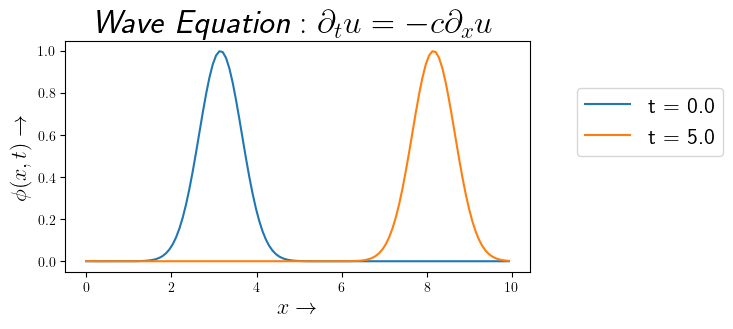

In [5]:
c = 1.0   # Wave speed
L = 10.0  # Length of the domain
N = 128   # Number of grid points
T = 5.0   # Total simulation time
dt = 0.01 # Time step
x = np.linspace(0, L, N, endpoint=False)
dx = x[1] - x[0]
phi_0 =  np.exp(-2*(x-np.pi)**2) 

plt.figure(figsize=(6,3))
phi = phi_0.copy()
phi_new = np.zeros(N)

for t in np.arange(0, T +dt , dt):
    k = 2 * np.pi * np.fft.fftfreq(N, d=dx)  # Wave numbers
    phi_hat = np.fft.fft(phi)
    phi_new_hat = phi_hat * np.exp(-1j * k * c * dt)
    phi_new = np.fft.ifft(phi_new_hat).real
    phi, phi_new = phi_new, phi
    
    if t%5 == 0:
        plt.plot(x, phi, label=f't = {t:.1f}')
        
plt.ylabel(r'$\phi(x,t)\rightarrow$',fontsize=16)
plt.xlabel(r'$x \rightarrow $',fontsize=16)
plt.title(r'$\textit{Wave Equation} : \partial_t u=-c\partial_x u$',fontsize=24,y=1.)
plt.legend(loc=(1.1, 0.5), fontsize=16)
plt.show()

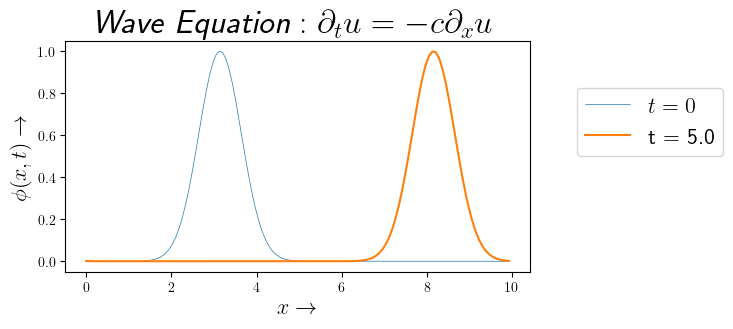

In [6]:
c = 1.0   # Wave speed
L = 10.0  # Length of the domain
N = 128   # Number of grid points
T = 5.0   # Total simulation time
dt = 0.01 # Time step
x = np.linspace(0, L, N, endpoint=False)
dx = x[1] - x[0]
phi_0 =  np.exp(-2*(x-np.pi)**2) 

phi = phi_0.copy()
phi_new = np.zeros(N)

for t in np.arange(0, T +dt , dt):
    k = 2 * np.pi * np.fft.fftfreq(N, d=dx)  # Wave numbers
    phi_hat = np.fft.fft(phi)
    phi_new_hat = phi_hat * np.exp(-1j * k * c * dt)
    phi_new = np.fft.ifft(phi_new_hat).real
    phi, phi_new = phi_new, phi
    
    if t%1 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(6,3))
        plt.plot(x, phi_0, label = '$t=0$', lw = 0.5)
        plt.plot(x, phi, label=f't = {t:.1f}')
        plt.ylabel(r'$\phi(x,t)\rightarrow$',fontsize=16)
        plt.xlabel(r'$x \rightarrow $',fontsize=16)
        plt.title(r'$\textit{Wave Equation} : \partial_t u=-c\partial_x u$',fontsize=24,y=1.)
        plt.legend(loc=(1.1, 0.5), fontsize=16)
        plt.show()

## Burgers Equation

$\textit{Burgers Equation} : \partial_t u + u\partial_x u = \nu\partial_{x}^2u$                                                                            
$\qquad\qquad\qquad\qquad\quad \partial_t u + \partial_x \frac{u^2}{2} = \nu\partial_{x}^2u$                                                           
$\quad \displaystyle {\frac{d}{dt} \hat{u}_k=-i\frac{k}{2} \hat{u^2}-\nu k^2 \hat{u}_k=-\hat{N}_k -\nu k^2 \hat{u}_k}  $                                
$\quad \displaystyle { \hat{u}_k^{n+1} = \hat{u}_k^n [1-\nu k (\Delta t)]- (\Delta t)\hat{N}_k }$                                                                                                                     

$\qquad\displaystyle{N_k = i k_x \mathrm{RFFT([IRFFT(f_k, N)*N]^2,N)/N}}$

In [7]:
def compute_Nk(fk,kx,N):
    f = np.fft.irfft(fk, N) * N  
    fk_prod = np.fft.rfft(f**2, N) / N  
    return 1j * kx * fk_prod

### Euler's forward scheme                                                                                                                            
$\quad \displaystyle {\frac{d}{dt} \hat{u}_k=-i\frac{k}{2} \hat{u^2}-\nu k^2 \hat{u}_k=-\hat{N}_k -\nu k^2 \hat{u}_k}  $                                
$\quad \displaystyle { \hat{u}_k'= \hat{u}_k\exp(\nu k^2 t)}$   
$\quad \displaystyle {\frac{d}{dt} \hat{u}_k'= -\hat{N}_k\exp(\nu k^2 t)}$                                                                        
$\quad \displaystyle { \hat{u}_k^{n+1} = [\hat{u}_k^n - (\Delta t)\hat{N}_k^n]\exp(\nu k^2 t) }$    
We simulate the Burgers equation in $x = [0,2π]$ with $\nu= 0.1$ up to final time of $1$ unit.                                                       
We start with an initial state of $\sin(x)$, and choose $Δt = 0.001$ for time stepping.                                                  

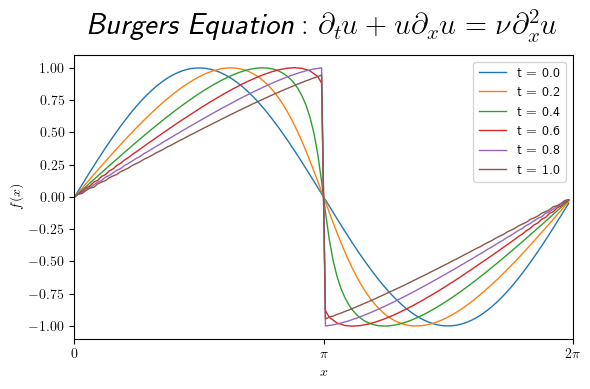

In [8]:
nu = 0.1e-6
tf = 1           
dt = 0.001         
nsteps = int(tf / dt)  
L = 2 * np.pi      
N = 129          
h = L / N          
j = np.arange(0, N)
x = j * h          
kx = np.fft.rfftfreq(N, d=h) * (2 * np.pi)  

fig, ax1 = plt.subplots(figsize=(6, 4))

f = np.sin(x)  
fk = np.fft.rfft(f, N) / N  
for i in range(nsteps + 1):
    Nk = compute_Nk(fk,kx,N)  
    fk = (fk - dt * Nk) * np.exp( nu * (kx)**2 * (i * dt))      # i*dt=t
    if i % 200 == 0:
        t = i * dt
        f_plot = np.fft.irfft(fk, N) * N 
        ax1.plot( x, f_plot, lw=1, label=f't = {t:.1f}')
ax1.set_xlim(0, 2 * np.pi)
ax1.set_xlabel('$x$', fontsize=10)
ax1.set_ylabel('$f(x)$', fontsize=10)
ax1.set_xticks([0, np.pi, 2 * np.pi])
ax1.set_xticklabels(['$0$', '$\pi$', '$2\pi$'])
plt.title(r'$\textit{Burgers Equation}: \partial_t u + u \partial_x u = \nu \partial_{x}^2 u$', fontsize=22, y=1.041)
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

### RK2 scheme                                                                                                                                     
We simulate the Burgers equation in $x = [0,2π]$ with $\nu= 0.1$ up to final time of $1$ unit.                                                       
We start with an initial state of $\sin(x)$, and choose $Δt = 0.001$ for time stepping.                                                              
We employ the exponential trick, and time advance the nonlinear term using **RK2** method.

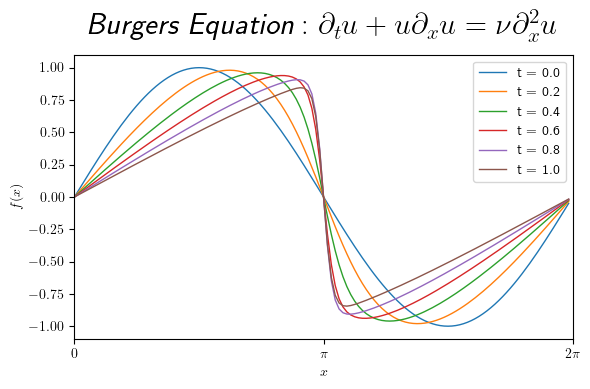

In [9]:
nu = 0.1           
tf = 1.0          
dt = 0.001        
nsteps = int(tf / dt)  
L = 2 * np.pi    
N = 128         
h = L / N        
j = np.arange(0, N)
x = j * h       
kx = np.fft.rfftfreq(N, d=h) * (2 * np.pi)  

fig, ax1 = plt.subplots(figsize=(6, 4))

f = np.sin(x) 
fk = np.fft.rfft(f, N) / N
for i in range(nsteps + 1):
    Nk = compute_Nk(fk,kx,N)  
    fk_mid = (fk - (dt / 2) * Nk) * np.exp(-nu * kx**2 * dt / 2)
    Nk_mid = compute_Nk(fk_mid,kx,N) 
    fk = (fk - dt * Nk_mid) * np.exp(-nu * kx**2 * dt) 
    if i % 200 == 0:
        t = i * dt
        f_plot = np.fft.irfft(fk, N) * N 
        ax1.plot(x, f_plot, lw=1, label=f't = {t:.1f}')
ax1.set_xlim(0, 2 * np.pi)
ax1.set_xlabel('$x$', fontsize=10)
ax1.set_ylabel('$f(x)$', fontsize=10)
ax1.set_xticks([0, np.pi, 2 * np.pi])
ax1.set_xticklabels(['$0$', '$\pi$', '$2\pi$'])
plt.title(r'$\textit{Burgers Equation}: \partial_t u + u \partial_x u = \nu \partial_{x}^2 u$', fontsize=22, y=1.041)
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

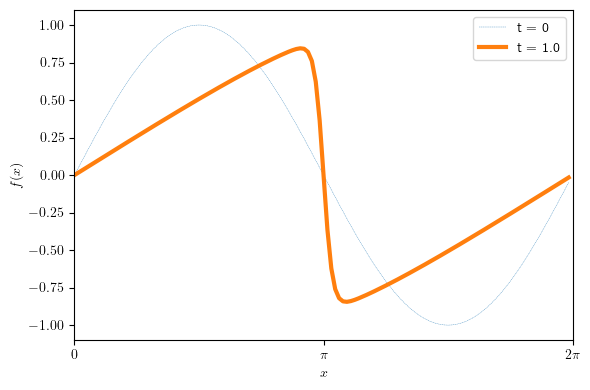

In [10]:
nu = 0.1           
tf = 1.0          
dt = 0.001        
nsteps = int(tf / dt)  
L = 2 * np.pi    
N = 128         
h = L / N        
j = np.arange(0, N)
x = j * h       
kx = np.fft.rfftfreq(N, d=h) * (2 * np.pi)  


f = np.sin(x) 
fk = np.fft.rfft(f, N) / N
for i in range(nsteps + 1):
    Nk = compute_Nk(fk,kx,N)  
    fk_mid = (fk - (dt / 2) * Nk) * np.exp(-nu * kx**2 * dt / 2)
    Nk_mid = compute_Nk(fk_mid,kx,N) 
    fk = (fk - dt * Nk_mid) * np.exp(-nu * kx**2 * dt) 
    if i % 200 == 0:
        t = i * dt
        f_plot = np.fft.irfft(fk, N) * N 
        
        clear_output(wait=True)
        fig, ax1 = plt.subplots(figsize=(6, 4))
        ax1.plot( x, f, '--', lw=0.25, label=f't = 0')
        ax1.plot( x, f_plot, lw=3, label=f't = {t:.1f}')
        ax1.set_xlim(0, 2 * np.pi)
        ax1.set_xlabel('$x$', fontsize=10)
        ax1.set_ylabel('$f(x)$', fontsize=10)
        ax1.set_xticks([0, np.pi, 2 * np.pi])
        ax1.set_xticklabels(['$0$', '$\pi$', '$2\pi$'])
        plt.legend(loc='upper right', fontsize=10)
        plt.tight_layout()
        plt.show()

 ### Crank-Nicolson scheme                                                                                                                                              
                                                                                                                                            
$\quad \displaystyle { \hat{u}_k^{n+1} = \hat{u}_k^n - \nu k^2 \frac{(\Delta t)}{2} \big( \hat{u}_k^n + \hat{u}_k^{n+1} \big) - (\Delta t)\hat{N}_k }$           
$\quad \displaystyle{\hat{u}_k^{n+1} = \hat{u}_k^n - \nu k^2 \frac{(\Delta t)}{2} \hat{u}_k^n - \nu k^2 \frac{(\Delta t)}{2} \hat{u}_k^{n+1} - (\Delta t)\hat{N}_k }$                                                                                                                                                           
$\quad \displaystyle { \hat{u}_k^{n+1} + \nu k^2 \frac{(\Delta t)}{2} \hat{u}_k^{n+1} = \hat{u}_k^n - \nu k^2 \frac{(\Delta t)}{2} \hat{u}_k^n - (\Delta t)\hat{N}_k }$                                                                                                                                           
$\quad \displaystyle { \hat{u}_k^{n+1}\bigg[1 + \nu k^2 \frac{(\Delta t)}{2} \bigg] = \hat{u}_k^n\bigg[1 - \nu k^2 \frac{(\Delta t)}{2}\bigg] - (\Delta t)\hat{N}_k }$                                                                                                                                            
$\quad \displaystyle { \hat{u}_k^{n+1} = \frac{ \hat{u}_k^n\bigg[1 - \nu k^2 \frac{(\Delta t)}{2}\bigg] - (\Delta t)\hat{N}_k } { \bigg[1 + \nu k^2 \frac{(\Delta t)}{2} \bigg] } }$                                                                                                                                                                                                                                                                                                     
since $ \quad \frac{1}{1+\nu k^2 (\Delta t)/2} \approx 1 $                                                                                                                         
$\quad \displaystyle { \hat{u}_k^{n+1} = \hat{u}_k^n \bigg[ \frac{1-\nu k^2 (\Delta t)/2}{1+\nu k^2 (\Delta t)/2} \bigg]- (\Delta t)\hat{N}_k }$                                                        

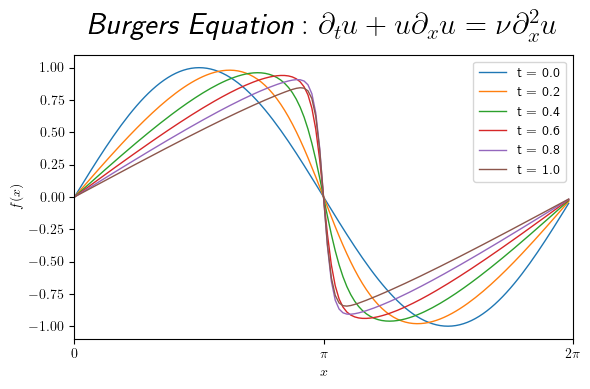

In [11]:
nu = 0.1          
tf = 1.0          
dt = 0.001        
nsteps = int(tf / dt) 
L = 2 * np.pi     
N = 128        
h = L / N          
j = np.arange(0, N)
x = j * h          
kx = np.fft.rfftfreq(N, d=h) * (2 * np.pi)  

fig, ax1 = plt.subplots(figsize=(6, 4))

f = np.sin(x)  
fk = np.fft.rfft(f, N) / N 
for i in range(nsteps + 1):
    Nk = compute_Nk(fk, kx, N)  
    fk_new = ( fk * (1 - nu * kx**2 * dt / 2)  - dt * Nk  ) / (1 + nu * kx**2 * dt / 2) 
    fk = fk_new
    if i % 200 == 0:
        t = i * dt
        f_plot = np.fft.irfft(fk, N) * N  # Convert back to physical space
        ax1.plot(x, f_plot, '-', lw=1, label=f't = {t:.1f}')

ax1.set_xlim(0, 2 * np.pi)
ax1.set_xlabel('$x$', fontsize=10)
ax1.set_ylabel('$f(x)$', fontsize=10)
ax1.set_xticks([0, np.pi, 2 * np.pi])
ax1.set_xticklabels(['$0$', '$\pi$', '$2\pi$'])
plt.title(r'$\textit{Burgers Equation}: \partial_t u + u \partial_x u = \nu \partial_{x}^2 u$', fontsize=22, y=1.041)
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

## KdV Equation

$\textit{KdV Equation} : \partial_t u + u\partial_x u = \kappa\partial_{x}^3u$


We simulate **KdV** equation for $\kappa = 0.1$ up to $2$ time unit. We take $dt = 0.001$. The initial condition is chosen as $\sin(x)$.                                                                                                                  
We employ exponential trick for absorbing the diffusion term, and time advance the nonlinear term using leapfrog method.     
At t = 2, we observe several solitons, which are stable hump-like structures.

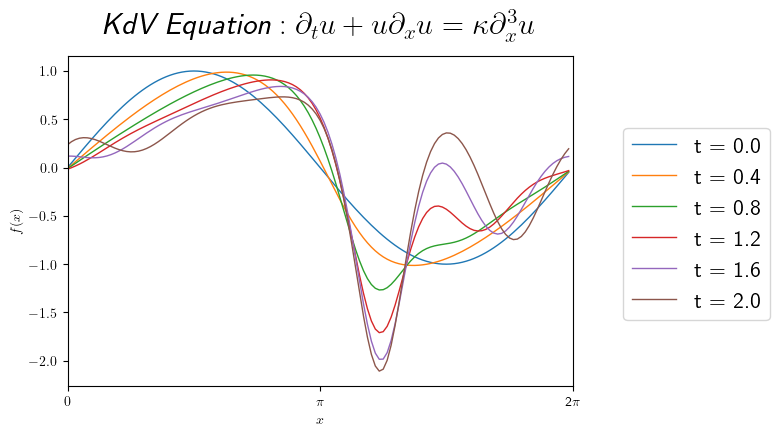

In [12]:
kappa = 0.1
tf = 2
dt = 0.001
nsteps = int(tf/dt)
L = 2*np.pi
N = 128
h = L/N
j = np.arange(0,N)
x = j*h
kx = np.linspace(0, N//2, N//2+1)

fig, ax1 = plt.subplots(figsize=(6, 4))

f = np.sin(x)
fk = np.fft.rfft(f,N)/N
prev = fk                       
Nk = compute_Nk(fk,kx,N)
curr = (prev - dt*Nk)*np.exp(-1j*kappa*kx**3*dt)
for i in range(nsteps+2):
    Nk = compute_Nk(curr,kx,N)
    fk = (prev - dt*Nk)*np.exp(-1j*kappa*kx**3*dt)
    if (i%400 == 0):
        t = i*dt
        f = np.fft.irfft(fk,N)*N
        ax1.plot(x, f, lw = 1, label=f't = {t:.1f}')
    prev = curr
    curr = fk
ax1.set_xlim(0,2*np.pi)
ax1.set_xlabel('$x$',fontsize=10)
ax1.set_ylabel('$f(x)$',fontsize=10)
ax1.set_xticks([0, np.pi, 2*np.pi])
ax1.set_xticklabels(['$0$', '$\pi$', '2$\pi$'])
plt.tight_layout()
plt.title(r'$\textit{KdV Equation} : \partial_t u + u\partial_x u = \kappa\partial_{x}^3u$', fontsize=22,y=1.041)
plt.legend(loc=(1.1, 0.2), fontsize=16)
plt.show()

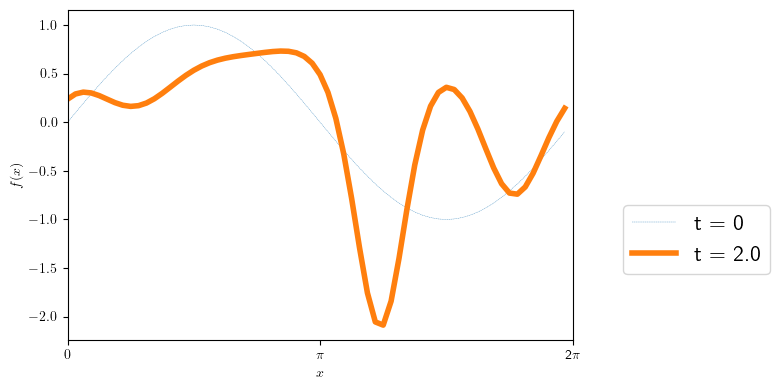

In [13]:
kappa = 0.1
tf = 2
dt = 0.001
nsteps = int(tf/dt)
L = 2*np.pi
N = 64
h = L/N
j = np.arange(0,N)
x = j*h
kx = np.linspace(0, N//2, N//2+1)

f = np.sin(x)
fk = np.fft.rfft(f,N)/N
prev = fk                       
Nk = compute_Nk(fk,kx,N)
curr = (prev - dt*Nk)*np.exp(-1j*kappa*kx**3*dt)
for i in range(nsteps+2):
    Nk = compute_Nk(curr,kx,N)
    fk = (prev - dt*Nk)*np.exp(-1j*kappa*kx**3*dt)
    if (i%400 == 0):
        t = i*dt
        fr = np.fft.irfft(fk,N)*N
        clear_output(wait=True)
        fig, ax1 = plt.subplots(figsize=(6, 4))
        ax1.plot( x, f, '--', lw=0.25, label=f't = 0')
        ax1.plot(x, fr, lw = 4, label=f't = {t:.1f}')
        ax1.set_xlim(0,2*np.pi)
        ax1.set_xlabel('$x$',fontsize=10)
        ax1.set_ylabel('$f(x)$',fontsize=10)
        ax1.set_xticks([0, np.pi, 2*np.pi])
        ax1.set_xticklabels(['$0$', '$\pi$', '2$\pi$'])
        plt.tight_layout()
        plt.legend(loc=(1.1, 0.2), fontsize=16)
        plt.show()
    prev = curr
    curr = fk

## KPZ Equation

$\textit{KPZ Equation} : \partial_t h =\frac{1}{2} (\partial_x h)^2 + \nu\partial_{x}^2h$

Solve the **KPZ** equation (given below) numerically in a periodic box $[0,2π]$. Take $\nu = 0.1$.

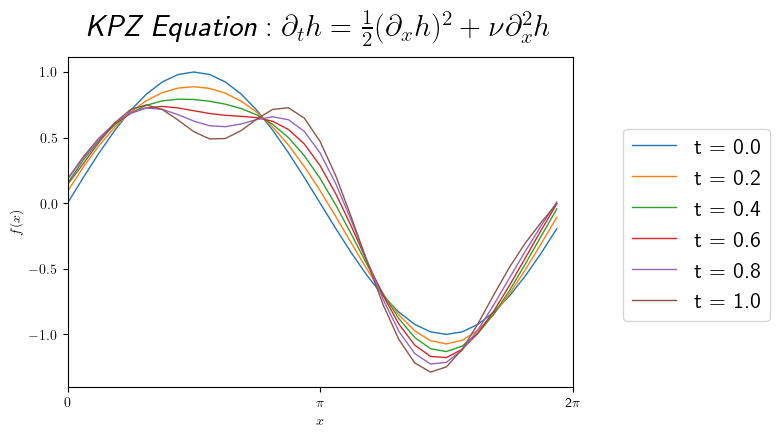

In [14]:
nu = 0.1
tf = 1
dt = 0.001
nsteps = int(tf/dt)
L = 2*np.pi
N = 32
h = L/N
j = np.arange(0,N)
x = j*h
kx = np.linspace(0, N//2, N//2+1)

fig, ax1 = plt.subplots(figsize=(6, 4))

f = np.sin(x)
fk = np.fft.rfft(f,N)/N
# Evolution wirh RK2 method.
for i in range(nsteps+2):
        Nk = compute_Nk(fk,kx,N)
        fk_mid = (fk - (dt/2) * Nk**2)*np.exp(-nu*kx**2*dt/2)
        Nk_mid = compute_Nk(fk_mid,kx,N)
        fk = (fk -dt*Nk_mid**2)*np.exp(-nu*kx**2*dt)
        if (i%200 == 0):
            t = i*dt
            f = np.fft.irfft(fk,N)*N
            ax1.plot(x, f, lw = 1, label=f't = {t:.1f}')
        
ax1.set_xlim(0,2*np.pi)
ax1.set_xlabel('$x$',fontsize=10)
ax1.set_ylabel('$f(x)$',fontsize=10)
ax1.set_xticks([0, np.pi, 2*np.pi])
ax1.set_xticklabels(['$0$', '$\pi$', '2$\pi$'])
plt.tight_layout()
plt.title(r'$\textit{KPZ Equation} : \partial_t h = \frac{1}{2}(\partial_x h)^2 + \nu\partial_{x}^2h$',fontsize=22,y=1.041)
plt.legend(loc=(1.1, 0.2), fontsize=16)
plt.show()

# Navier-Strokes Eqn.                                                                                                                                   
$\textit{Burgers Equation} : \partial_t u + u\partial_x u = \nu\partial_{x}^2u$                                                                           
This is generalized to the **Navier–Stokes equations**,
                                                                                         
$\qquad\displaystyle \partial_t u + u\nabla u = -\nabla p + \nu\nabla^2 u$                                                                                                 
$\qquad\displaystyle\nabla\cdot u=0$                                                                                                                                         
The velocity field is transformed to Fourier space,                                                                                                      
$\qquad \displaystyle \frac{d}{dt}\hat{u}_{k,i} = -ik_j\widehat{u_ju_i}_k -ik_i\hat{p}_k-\nu k^2\hat{u}_{k,i}=-\hat{N}_{k,i} -ik_i\hat{p}_k-\nu k^2\hat{u}_{k,i} $                                                                                                                                                                                                                                                                              
With the incompressibility condition, $ \ \displaystyle k_i \hat{u}_{k,i}=0$                                        

$\qquad\displaystyle \hat{u}_{k,i} \ \underrightarrow{IFFT} \ u_i(r) \ \underrightarrow{\text{Mult }} \ u_j(r)u_i(r) \ \underrightarrow{FFt} \ \widehat{(u_j u_i)}_k \ \underrightarrow{\text{Mult }ik_j} \ ik_j\widehat{(u_j u_i)}_k$                                                                                              
The pressure $p$ is determined by solving, $\qquad\displaystyle -\nabla^2 p=\nabla\cdot[u\cdot\nabla u]=\nabla\cdot N$                                                                               
In Fourier space, $\qquad\displaystyle \hat{p}_k=i\frac{1}{k}k\cdot\hat{N}_k$                                                                                                     
From Time-stepping Forward Euler , $\qquad\displaystyle \hat{u}_k^{n+1} = \hat{u}_k^{n}\left[ 1-\nu k^2(\Delta t) \right]  + (\Delta t)\left[-\hat{N}_k - ik\hat{p}_k^n\right]$

#### 2D 

Solve the **incompressible Navier–Stokes equations** in a 2D periodic domain of size $(2\pi)^2$:

$\qquad\qquad\displaystyle\frac{\partial \mathbf{u}}{\partial t} + \mathbf{u} \cdot \nabla \mathbf{u} = -\nabla p + \nu \nabla^2 \mathbf{u}, \quad \nabla \cdot \mathbf{u} = 0$

Let the initial velocity field be given by the **Taylor–Green vortex**:

$\qquad\qquad\displaystyle \left\{\begin{array}{rl} u_x(x, y) &= \quad \sin(x) \cos(y), \\ u_y(x, y) &= -\cos(x) \sin(y). \end{array} \right. $                                                                  

* Viscosity: $\nu = 0.1$
* Grid: $32 \times 32$
* Domain: $x, y \in [0, 2\pi)$
* Final time: $T = 1.0$
                                                                                                                                                            
Evolve the velocity field from $t = 0$ to $t = 1$ using a spectral method and visualize the evolution of the velocity magnitude or vorticity.

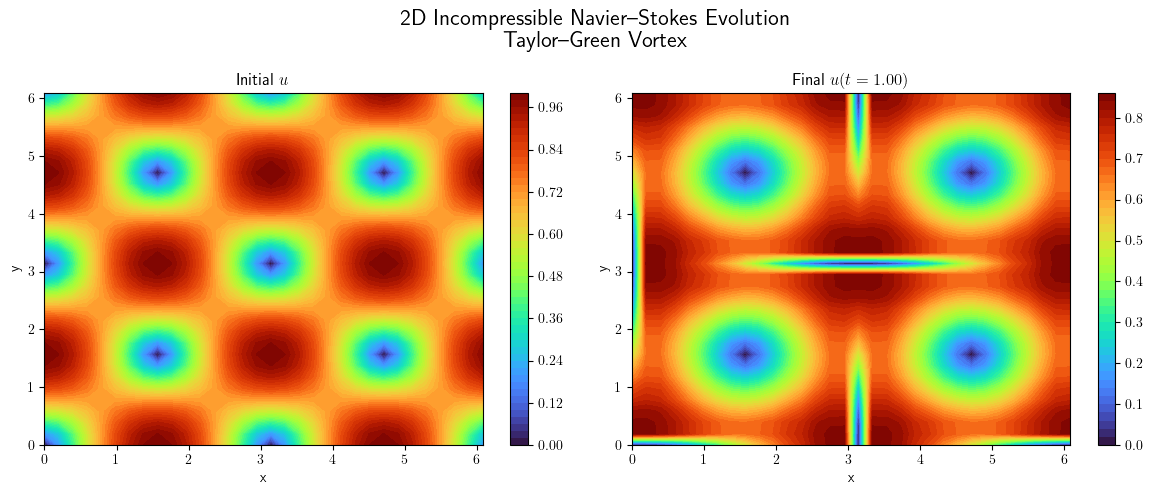

In [16]:
N      = 32
L      = 2 * np.pi
nu     = 0.1
T      = 1
dt     = 0.01
nsteps = int(T / dt)
x      = np.linspace(0, L, N, endpoint=False)
y      = x.copy()
X, Y   = np.meshgrid(x, y, indexing="ij")

# Wave numbers
kx       = np.fft.fftfreq(N, d=L / N) * 2 * np.pi
ky       = kx.copy()
KX, KY   = np.meshgrid(kx, ky, indexing="ij")
K2       = KX**2 + KY**2
K2[0, 0] = 1.0  # to avoid division by zero
invK2    = 1.0 / K2

# Initial condition: Taylor-Green vortex
u     =  np.sin(X) * np.cos(Y)
v     = -np.cos(X) * np.sin(Y)
u_hat = np.fft.fft2(u)
v_hat = np.fft.fft2(v)
speed_init = np.sqrt(u**2 + v**2)

def compute_nonlinear_terms(u_hat, v_hat):
    # Convert to real space
    u = np.fft.ifft2(u_hat).real
    v = np.fft.ifft2(v_hat).real

    # Compute derivatives
    ux = np.fft.ifft2(1j * KX * u_hat).real
    uy = np.fft.ifft2(1j * KY * u_hat).real
    vx = np.fft.ifft2(1j * KX * v_hat).real
    vy = np.fft.ifft2(1j * KY * v_hat).real

    # Compute convective (nonlinear) terms in real space
    N1 = u * ux + v * uy
    N2 = u * vx + v * vy
    return np.fft.fft2(N1), np.fft.fft2(N2) # Transform back to Fourier space

# Time loop
for step in range(nsteps + 1):
    N1_hat, N2_hat = compute_nonlinear_terms(u_hat, v_hat)

    # Pressure projection (make flow incompressible)
    div_hat = 1j * (KX * N1_hat + KY * N2_hat)
    p_hat = div_hat * invK2

    N1_hat -= 1j * KX * p_hat
    N2_hat -= 1j * KY * p_hat

    # Time integration (Euler step + diffusion)
    decay = np.exp(-nu * K2 * dt)
    u_hat = (u_hat - dt * N1_hat) * decay
    v_hat = (v_hat - dt * N2_hat) * decay

    # Plotting
    if step % 20 == 0 or step == nsteps:
        u_real = np.fft.ifft2(u_hat).real
        v_real = np.fft.ifft2(v_hat).real
        speed_now = np.sqrt(u_real**2 + v_real**2)

        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        c0 = ax[0].contourf(X, Y, speed_init, cmap='turbo', levels=50)
        #ax[0].quiver(X, Y, u_real, v_real, scale=40, color='k', alpha=0.5)
        fig.colorbar(c0, ax=ax[0])
        ax[0].set_title(r"Initial $u$")

        c1 = ax[1].contourf(X, Y, speed_now, cmap='turbo', levels=50)
        #ax[1].quiver(X, Y, u_real, v_real, scale=40, color='k', alpha=0.5)        
        fig.colorbar(c1, ax=ax[1])
        ax[1].set_title(f"Final $u  (t = {step*dt:.2f})$")

        for a in ax:
            a.set_xlabel("x")
            a.set_ylabel("y")

        plt.suptitle("2D Incompressible Navier–Stokes Evolution\nTaylor–Green Vortex", fontsize=16)
        plt.tight_layout()
        clear_output(wait=True)
        plt.show()

#### 3D

Solve the **incompressible Navier–Stokes equations** in a 3D periodic domain of size $(2\pi)^3$:

$\qquad\qquad\displaystyle\frac{\partial \mathbf{u}}{\partial t} + \mathbf{u} \cdot \nabla \mathbf{u} = -\nabla p + \nu \nabla^2 \mathbf{u}, \quad \nabla \cdot \mathbf{u} = 0$

Let the initial velocity field be given by the **Taylor–Green vortex**:

$\qquad\qquad\displaystyle \left\{\begin{array}{rl} u_x(x, y, z) = \cos(x)\sin(y)\sin(z), \\ u_y(x, y, z) = \sin(x) \cos(y) \sin(z), \\ u_z(x, y, z) = \sin(x) \sin(y) \cos(z). \end{array} \right. $                                                                 

* Viscosity: $\nu = 0.1$
* Grid: $32 \times 32 \times 32$
* Domain: $x, y, z \in [0, 2\pi)$
* Final time: $T = 1.0$
                                                                                                                                                            
Evolve the velocity field from $t = 0$ to $t = 1$ using a spectral method and visualize the evolution of the velocity magnitude or vorticity.

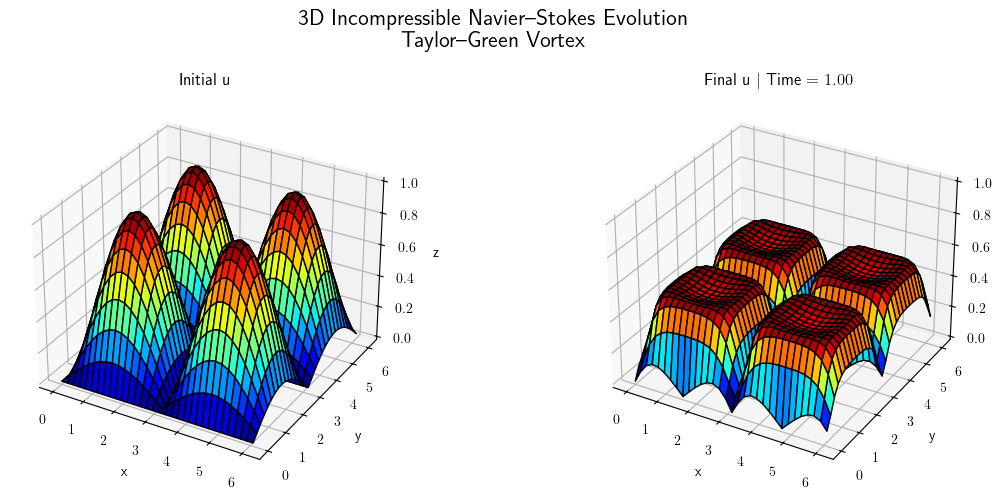

In [21]:
N       = 32
L       = 2 * np.pi
nu      = 0.1
T       = 1.0
dt      = 0.01
nsteps  = int(T / dt)
x       = np.linspace(0, L, N, endpoint=False)
X, Y, Z = np.meshgrid(x, x, x, indexing='ij')
idx     = N // 2  # z-slice index

# Wave numbers
kx          = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
KX, KY, KZ  = np.meshgrid(kx, kx, kx, indexing='ij')
K2          = KX**2 + KY**2 + KZ**2
K2[0, 0, 0] = 1.0  # avoid division by zero
invK2       = 1.0 / K2

# Taylor-Green initial velocity
u     = np.cos(X) * np.sin(Y) * np.sin(Z)
v     = np.sin(X) * np.cos(Y) * np.sin(Z)
w     = np.sin(X) * np.sin(Y) * np.cos(Z)
u_hat = np.fft.fftn(u)
v_hat = np.fft.fftn(v)
w_hat = np.fft.fftn(w)
speed_init = np.sqrt(u**2 + v**2 + w**2)[:, :, idx]

# Nonlinear term function
def compute_nonlinear_terms(u_hat, v_hat, w_hat):
    u = np.fft.ifftn(u_hat).real
    v = np.fft.ifftn(v_hat).real
    w = np.fft.ifftn(w_hat).real

    ux = np.fft.ifftn(1j * KX * u_hat).real
    uy = np.fft.ifftn(1j * KY * u_hat).real
    uz = np.fft.ifftn(1j * KZ * u_hat).real

    vx = np.fft.ifftn(1j * KX * v_hat).real
    vy = np.fft.ifftn(1j * KY * v_hat).real
    vz = np.fft.ifftn(1j * KZ * v_hat).real

    wx = np.fft.ifftn(1j * KX * w_hat).real
    wy = np.fft.ifftn(1j * KY * w_hat).real
    wz = np.fft.ifftn(1j * KZ * w_hat).real

    N1 = u * ux + v * uy + w * uz
    N2 = u * vx + v * vy + w * vz
    N3 = u * wx + v * wy + w * wz

    return np.fft.fftn(N1), np.fft.fftn(N2), np.fft.fftn(N3)

# Time loop
for step in range(nsteps + 1):
    N1_hat, N2_hat, N3_hat = compute_nonlinear_terms(u_hat, v_hat, w_hat)

    # Pressure projection
    div_hat = 1j * (KX * N1_hat + KY * N2_hat + KZ * N3_hat)
    p_hat = div_hat * invK2

    N1_hat -= 1j * KX * p_hat
    N2_hat -= 1j * KY * p_hat
    N3_hat -= 1j * KZ * p_hat

    # Time stepping
    decay = np.exp(-nu * K2 * dt)
    u_hat = (u_hat - dt * N1_hat) * decay
    v_hat = (v_hat - dt * N2_hat) * decay
    w_hat = (w_hat - dt * N3_hat) * decay

    # Plot every 20 steps
    if step % 20 == 0 or step == nsteps:
        u_real = np.fft.ifftn(u_hat).real
        v_real = np.fft.ifftn(v_hat).real
        w_real = np.fft.ifftn(w_hat).real
        speed_now = np.sqrt(u_real**2 + v_real**2 + w_real**2)[:, :, idx]

        if step == nsteps:
            speed_final = speed_now.copy()

        # Setup figure
        fig, ax = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={"projection": "3d"})
        surf0 = ax[0].plot_surface(X[:, :, idx], Y[:, :, idx], speed_init, cmap='jet', edgecolor='k')
        ax[0].set_title("Initial u")

        surf1 = ax[1].plot_surface(X[:, :, idx], Y[:, :, idx], speed_now, cmap='jet', edgecolor='k')
        ax[1].set_title(rf"Final u $|$ Time $= {step*dt:.2f}$")
        ax[1].set_zlim(0,1)
        
        for a in ax:
            a.set_xlabel("x")
            a.set_ylabel("y")
            a.set_zlabel("z")

        plt.suptitle("3D Incompressible Navier–Stokes Evolution\nTaylor–Green Vortex", fontsize=16)
        plt.tight_layout()
        clear_output(wait=True)
        plt.show()

#### 2D

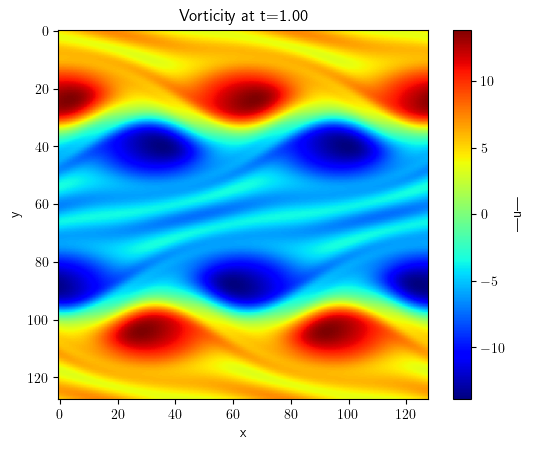

In [19]:
def grad(v):
    v_hat = np.fft.fftn(v)
    dvx = np.real(np.fft.ifftn(1j * kx * v_hat))
    dvy = np.real(np.fft.ifftn(1j * ky * v_hat))
    return dvx, dvy

def div(vx, vy):
    dvx_x = np.real(np.fft.ifftn(1j * kx * np.fft.fftn(vx)))
    dvy_y = np.real(np.fft.ifftn(1j * ky * np.fft.fftn(vy)))
    return dvx_x + dvy_y

def poisson_solve(rho):
    V_hat = -np.fft.fftn(rho) * kSq_inv
    return np.real(np.fft.ifftn(V_hat))

def diffusion_solve(v):
    return np.real(np.fft.ifftn(np.fft.fftn(v) / (1 + dt * nu * kSq)))

def apply_dealias(f, dealias):
    return np.real(np.fft.ifftn(dealias * np.fft.fftn(f)))

# Parameters
L = 1.0          # Domain size
N = 128          # Number of grid points
nu = 0.001       # Viscosity
dt = 0.001       # Time step
tEnd = 1.0       # End time
tOut = 0.05      # Time output interval

# Create grid
x = np.linspace(0, L, N, endpoint=False)  # 1D grid points
y = np.linspace(0, L, N, endpoint=False)
xx, yy = np.meshgrid(x, y)  # 2D grid points

# Initial conditions: Vortex
vx = np.sin(2 * np.pi * yy)
vy = np.cos(2 * np.pi * xx*2 )

# Fourier space variables
k = 2 * np.pi / L * np.fft.fftfreq(N, d=L/N)  # Wave numbers
kx, ky = np.meshgrid(k, k)
kSq = kx**2 + ky**2
kSq_inv = 1.0 / kSq
kSq_inv[kSq == 0] = 0  # Avoid division by zero

# Dealiasing mask
dealias = (np.abs(kx) < (2/3) * np.max(k)) & (np.abs(ky) < (2/3) * np.max(k))

# Time stepping
t = 0
Nt = int(np.ceil(tEnd / dt))
outputCount = 1

for i in range(Nt):
    # Advection term: -(v.grad)v
    dvx, dvy = grad(vx), grad(vy)
    rhs_x = -(vx * dvx[0] + vy * dvx[1])
    rhs_y = -(vx * dvy[0] + vy * dvy[1])

    rhs_x = apply_dealias(rhs_x, dealias)
    rhs_y = apply_dealias(rhs_y, dealias)

    # Update velocity
    vx += dt * rhs_x
    vy += dt * rhs_y

    # Poisson solve for pressure
    div_rhs = div(rhs_x, rhs_y)
    P = poisson_solve(div_rhs)
    dPx, dPy = grad(P)

    # Correct velocities
    vx -= dt * dPx
    vy -= dt * dPy

    # Diffusion solve
    vx = diffusion_solve(vx)
    vy = diffusion_solve(vy)

    # Vorticity (for plotting)
    wz = np.real(np.fft.ifftn(1j * ky * np.fft.fftn(vx) - 1j * kx * np.fft.fftn(vy)))

    # Time update
    t += dt

    # Plot in real time
    if t + dt > outputCount * tOut:
        clear_output(wait=True)  # Clear previous output
        plt.clf()
        plt.imshow(wz, cmap='jet')
        plt.title(f'Vorticity at t={t:.2f}')
        #plt.axis('off')
        plt.colorbar(label='|u|')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()
        outputCount += 1

# Schrodinger's Eqn.

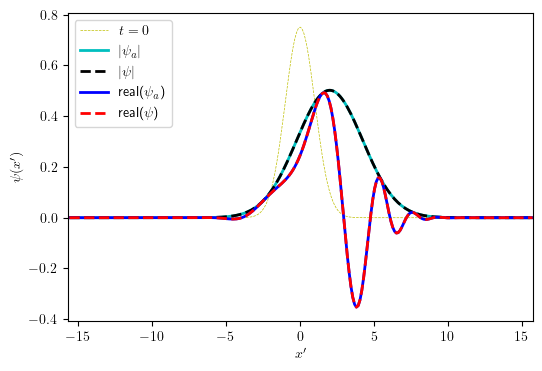

In [20]:
tf = 2
L = 10*np.pi
N = 256
h = L/N
j = np.arange(0,N)
x = j*h-L/2+h

a      = 0.1
k0     = 10
k0a    = k0*a
f      = 1/np.sqrt(np.sqrt(np.pi))*np.exp(-x**2/2)*np.exp(1j*k0a*x)
fk     = np.fft.fft(f,N)/N
kx_pos = np.linspace(0, N//2, N//2+1)
kx_neg = np.linspace(-N//2+1,-1,N//2-1)
kx     = np.concatenate((kx_pos, kx_neg))*(2*np.pi/L)

fk_t = fk*np.exp(-1j*kx**2*tf/2)
f_t  = np.fft.ifft(fk_t,N)*N # final solution in real space

amp       = 1/np.sqrt(np.sqrt(np.pi)*(1+1j*tf))
exp_term  = np.exp(-(x-k0a*tf)**2/(2*(1+1j*tf)))
wave_term = np.exp(1j*k0a*(x-k0a*tf/2))
f_exact   = amp*exp_term*wave_term
g         = abs(f_exact)

fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(x, abs(f), 'y--', label = '$t=0$', lw = 0.5)
ax1.plot(x, abs(f_exact), 'c-', label = '$|\psi_a|$', lw = 2)
ax1.plot(x, abs(f_t), 'k--', label = '$|\psi|$', lw = 2)
ax1.plot(x,np.real(f_exact), 'b-', label = 'real($\psi_a$)', lw = 2)
ax1.plot(x,np.real(f_t),'r--', label = 'real($\psi$)', lw = 2)
ax1.set_xlim(-L/2,L/2)
ax1.set_xlabel("$x'$",fontsize=10)
ax1.set_ylabel("$\psi(x')$",fontsize=10)
plt.legend(loc= 'upper left')
plt.show()